<h1>Trabalho final de Inteligência Artificial</h1>

<h5>Iarah Gonçalves de Almeida</h5>
<h5>Paulo Augusto Borges de Matos</h5>
<h5>David Walter Jansen</h5>

<h3>Bibliotecas necessárias</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

<h3>Carregando a base de dados</h3>

As 17 características extraídas dos experimentos <b>c1</b>, <b>c4</b> e <b>c6</b> foram armazenadas em arquivos no formato .mat do Matlab (<i>x1_17.mat</i>, <i>x4_17.mat</i> e <i>x6_17.mat</i>), bem como as medições do desgaste máximo dos experimentos (<i>yt1.mat</i>, <i>yt4.mat</i> e <i>yt6.mat</i>). Em seguida, os arquivos .mat foram convertidos para o formato .csv através de um script do Matlab e, então, carregados através do Pandas. O nome das colunas da base de dados também é definida.

In [2]:
names = ['rmsFX', 'maxFX', 'stdFX', 'rmsFY', 'maxFY', 'stdFY', 'rmsFZ', 'maxFZ', 'stdFZ', 'rmsVX', 'kVX', 'rmsVY', 'kVY', 'rmsVZ', 'kVZ', 'meanEA', 'stdEA']
target = ['maxDesg']
df1 = pd.read_csv('x1.csv', names = names)
df4 = pd.read_csv('x4.csv', names = names)
df6 = pd.read_csv('x6.csv', names = names)
df_yt1 = pd.read_csv('yt1.csv', names = target)
df_yt4 = pd.read_csv('yt4.csv', names = target)
df_yt6 = pd.read_csv('yt6.csv', names = target)
print(df1.shape);
print(df4.shape);
print(df6.shape);
print(df_yt1.shape);
print(df_yt4.shape);
print(df_yt6.shape);

(315, 17)
(315, 17)
(315, 17)
(315, 1)
(315, 1)
(315, 1)


Inclusão da coluna de desgaste máximo nos DataFrames dos experimentos.

In [3]:
df1['maxDesg'] = df_yt1['maxDesg']
df4['maxDesg'] = df_yt4['maxDesg']
df6['maxDesg'] = df_yt6['maxDesg']

<h3>Conhecendo a base de dados</h3>

Formato das bases de dados finais.

In [4]:
df1.head(5)

,rmsFX,maxFX,stdFX,rmsFY,maxFY,stdFY,rmsFZ,maxFZ,stdFZ,rmsVX,kVX,rmsVY,kVY,rmsVZ,kVZ,meanEA,stdEA,maxDesg
0,0.93297,3.744,0.84247,1.7529,10.724,1.6360,1.3298,4.560,1.1275,0.076914,3.1323,0.077509,3.1255,0.078697,3.1329,-0.000060,0.002230,48.893
1,2.12960,8.427,1.86500,3.3427,14.302,3.1500,1.9706,7.410,1.6836,0.085411,3.2752,0.085716,3.2360,0.087895,3.2774,0.038556,0.012941,49.571
2,3.20850,11.534,2.67210,5.3579,20.826,4.8160,3.2554,11.815,2.6897,0.095767,3.2627,0.094333,3.1945,0.098742,3.2432,0.066571,0.019153,50.303
3,3.65870,11.788,2.99260,6.1656,24.148,5.5325,3.7204,12.852,3.1213,0.099040,3.1920,0.097245,3.1430,0.102260,3.1314,0.080003,0.022860,51.084
4,4.11040,12.555,2.97980,6.2097,24.337,5.7474,3.4897,11.704,3.2947,0.085091,3.3030,0.084096,3.2531,0.092056,3.1694,0.089196,0.024688,52.250


In [5]:
df4.head(5)

,rmsFX,maxFX,stdFX,rmsFY,maxFY,stdFY,rmsFZ,maxFZ,stdFZ,rmsVX,kVX,rmsVY,kVY,rmsVZ,kVZ,meanEA,stdEA,maxDesg
0,2.5039,6.974,1.6977,2.8114,11.453,2.4989,1.4523,5.565,1.4112,0.076008,3.0407,0.076204,3.0353,0.078940,3.0300,0.031739,0.011924,31.416
1,2.5039,6.974,1.6977,2.8114,11.453,2.4989,1.4523,5.565,1.4112,0.076008,3.0407,0.076204,3.0353,0.078940,3.0300,0.031739,0.011924,34.893
2,3.5827,9.765,2.6111,4.8845,19.054,4.4938,2.2215,7.866,2.1286,0.083401,3.1219,0.080641,3.0336,0.086471,3.0513,0.056294,0.017970,38.103
3,4.2697,11.524,3.1355,5.9669,23.878,5.5030,2.8719,10.008,2.7291,0.084174,3.2141,0.081514,3.1221,0.088409,3.1438,0.074630,0.024345,41.061
4,3.7905,11.112,2.8576,5.8572,20.085,5.4858,3.1242,10.688,2.8077,0.083719,3.1951,0.081450,3.0689,0.089046,3.0824,0.074917,0.023768,43.781


In [6]:
df6.head(5)

,rmsFX,maxFX,stdFX,rmsFY,maxFY,stdFY,rmsFZ,maxFZ,stdFZ,rmsVX,kVX,rmsVY,kVY,rmsVZ,kVZ,meanEA,stdEA,maxDesg
0,1.0182,3.658,0.84082,1.4308,5.915,1.1755,1.0135,3.773,1.0049,0.063757,4.1869,0.065580,4.1207,0.068373,4.0671,0.002320,0.004033,62.789
1,2.1354,7.369,1.40150,3.1953,12.901,2.6344,2.2173,7.631,2.1500,0.074639,3.2204,0.081759,3.0686,0.085200,3.1893,0.054203,0.015408,64.136
2,3.1507,9.726,1.94460,4.7750,19.025,3.9705,3.4121,9.747,3.2556,0.079383,3.3560,0.096047,2.9869,0.103450,3.1999,0.083658,0.022583,65.365
3,3.6598,10.755,2.26780,5.4765,21.510,4.5200,3.8300,10.624,3.6368,0.085467,3.3535,0.103610,2.9794,0.114660,3.6656,0.100170,0.026011,66.487
4,3.6672,11.007,2.24420,5.2781,22.179,4.5610,3.9026,10.588,3.6753,0.093899,3.1025,0.115170,2.8889,0.126000,3.1176,0.108810,0.030732,67.511


Descrição das bases de dados finais.

In [7]:
df1.describe()

,rmsFX,maxFX,stdFX,rmsFY,maxFY,stdFY,rmsFZ,maxFZ,stdFZ,rmsVX,kVX,rmsVY,kVY,rmsVZ,kVZ,meanEA,stdEA,maxDesg
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,25.198839,57.466302,17.982989,12.065620,50.056917,10.631081,17.477368,45.973737,16.152775,0.124853,3.397320,0.118562,3.141273,0.139238,3.335517,0.122449,0.033409,113.905130
std,23.526890,45.273645,15.211930,4.415628,14.659606,4.146117,9.434308,21.013097,8.907682,0.041693,0.180502,0.039223,0.086938,0.039919,0.257750,0.024091,0.006341,27.820104
min,0.932970,3.744000,0.842470,1.752900,10.724000,1.636000,1.329800,4.560000,1.127500,0.076914,3.058400,0.075509,3.005800,0.078697,2.972800,-0.000060,0.002230,48.893000
25%,7.561350,18.195000,4.315300,8.544600,39.251000,7.277450,9.286600,28.261000,8.283050,0.090669,3.230950,0.085730,3.077700,0.105340,3.090650,0.112070,0.030212,94.569000
50%,14.825000,36.399000,11.677000,10.460000,45.908000,8.701200,15.127000,39.874000,14.124000,0.104190,3.386000,0.097411,3.125500,0.122210,3.320800,0.119160,0.033016,104.680000
75%,42.360500,100.990000,30.267000,15.774500,62.225000,14.176000,26.377000,67.602000,24.520500,0.167025,3.551250,0.152890,3.186200,0.179075,3.559750,0.123670,0.035234,133.495000
max,107.120000,178.400000,51.393000,24.160000,106.630000,22.878000,34.127000,79.475000,31.900000,0.218340,3.757500,0.202940,3.567000,0.228960,4.123800,0.247880,0.084318,172.690000


In [8]:
df4.describe()

,rmsFX,maxFX,stdFX,rmsFY,maxFY,stdFY,rmsFZ,maxFZ,stdFZ,rmsVX,kVX,rmsVY,kVY,rmsVZ,kVZ,meanEA,stdEA,maxDesg
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.00000,315.000000,315.000000,315.000000
mean,22.398581,54.706356,19.154030,11.410154,48.131286,9.762487,17.837170,47.855352,16.521356,0.124251,3.348451,0.113351,3.079271,0.137821,3.21337,0.113393,0.035393,106.399590
std,16.800852,38.984989,16.304194,3.769644,11.523523,3.439665,9.303481,22.168387,8.721440,0.043308,0.188944,0.035714,0.112243,0.041579,0.22353,0.029206,0.006759,38.597398
min,2.503900,6.974000,1.697700,2.811400,11.453000,2.498900,1.452300,5.565000,1.411200,0.076008,3.040700,0.076204,2.882900,0.078940,2.86460,0.031739,0.011924,31.416000
25%,7.837550,17.852500,4.213800,8.469450,40.175000,7.031050,10.047500,29.313000,9.400350,0.089943,3.183050,0.085511,3.006300,0.102990,3.06745,0.104370,0.032184,84.845500
50%,16.192000,41.482000,12.949000,10.129000,47.561000,8.375000,16.299000,44.503000,15.050000,0.108540,3.337600,0.098807,3.060700,0.128480,3.13550,0.108440,0.034553,97.944000
75%,35.477000,86.859500,31.670000,14.467000,58.526500,12.505500,25.594500,66.786500,23.786500,0.148295,3.487350,0.130750,3.134350,0.159980,3.29605,0.113080,0.037290,116.070000
max,57.109000,134.910000,52.973000,18.873000,67.934000,16.960000,34.457000,86.577000,32.461000,0.248060,4.180800,0.209950,3.503100,0.256040,4.01510,0.337010,0.089516,210.920000


In [9]:
df6.describe()

,rmsFX,maxFX,stdFX,rmsFY,maxFY,stdFY,rmsFZ,maxFZ,stdFZ,rmsVX,kVX,rmsVY,kVY,rmsVZ,kVZ,meanEA,stdEA,maxDesg
count,315.000000,315.000000,315.000000,315.00000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,22.182674,54.988121,18.751136,10.57573,44.760356,8.454232,17.210373,44.955527,15.809857,0.195185,4.033657,0.278071,3.296831,0.262944,4.158720,0.113057,0.030478,139.764473
std,16.479128,38.831955,16.010792,3.34637,10.358739,2.867876,8.679783,20.971199,8.196842,0.090604,0.389176,0.117994,0.391397,0.143853,0.387657,0.023516,0.004101,46.783737
min,1.018200,3.658000,0.840820,1.43080,5.915000,1.175500,1.013500,3.773000,1.004900,0.063757,3.102500,0.065580,2.715200,0.068373,3.026500,0.002320,0.004033,62.789000
25%,8.307000,19.353000,4.829100,8.01345,37.514500,6.285550,10.149500,28.513000,9.002800,0.108800,3.721300,0.174080,2.897300,0.142055,3.963350,0.102660,0.027327,111.150000
50%,16.190000,42.406000,12.596000,9.37840,43.545000,7.161400,15.521000,41.000000,14.492000,0.171170,4.168800,0.259490,3.359400,0.197930,4.118400,0.109830,0.030929,122.230000
75%,34.781500,85.510500,30.995500,13.33250,52.179000,10.676500,24.835500,61.997000,23.037000,0.291495,4.308800,0.416460,3.667200,0.387430,4.360800,0.115205,0.033263,168.460000
max,54.773000,128.990000,50.684000,17.44400,64.877000,14.324000,33.688000,85.408000,31.047000,0.357240,4.909600,0.460880,4.120700,0.545240,5.432700,0.249320,0.045366,234.720000


Checagem dos tipos de valores das bases de dados.

In [10]:
df1.apply(pd.to_numeric).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 18 columns):
rmsFX      315 non-null float64
maxFX      315 non-null float64
stdFX      315 non-null float64
rmsFY      315 non-null float64
maxFY      315 non-null float64
stdFY      315 non-null float64
rmsFZ      315 non-null float64
maxFZ      315 non-null float64
stdFZ      315 non-null float64
rmsVX      315 non-null float64
kVX        315 non-null float64
rmsVY      315 non-null float64
kVY        315 non-null float64
rmsVZ      315 non-null float64
kVZ        315 non-null float64
meanEA     315 non-null float64
stdEA      315 non-null float64
maxDesg    315 non-null float64
dtypes: float64(18)
memory usage: 44.4 KB


In [11]:
df4.apply(pd.to_numeric).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 18 columns):
rmsFX      315 non-null float64
maxFX      315 non-null float64
stdFX      315 non-null float64
rmsFY      315 non-null float64
maxFY      315 non-null float64
stdFY      315 non-null float64
rmsFZ      315 non-null float64
maxFZ      315 non-null float64
stdFZ      315 non-null float64
rmsVX      315 non-null float64
kVX        315 non-null float64
rmsVY      315 non-null float64
kVY        315 non-null float64
rmsVZ      315 non-null float64
kVZ        315 non-null float64
meanEA     315 non-null float64
stdEA      315 non-null float64
maxDesg    315 non-null float64
dtypes: float64(18)
memory usage: 44.4 KB


In [12]:
df6.apply(pd.to_numeric).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 18 columns):
rmsFX      315 non-null float64
maxFX      315 non-null float64
stdFX      315 non-null float64
rmsFY      315 non-null float64
maxFY      315 non-null float64
stdFY      315 non-null float64
rmsFZ      315 non-null float64
maxFZ      315 non-null float64
stdFZ      315 non-null float64
rmsVX      315 non-null float64
kVX        315 non-null float64
rmsVY      315 non-null float64
kVY        315 non-null float64
rmsVZ      315 non-null float64
kVZ        315 non-null float64
meanEA     315 non-null float64
stdEA      315 non-null float64
maxDesg    315 non-null float64
dtypes: float64(18)
memory usage: 44.4 KB


Visualização das bases de dados.

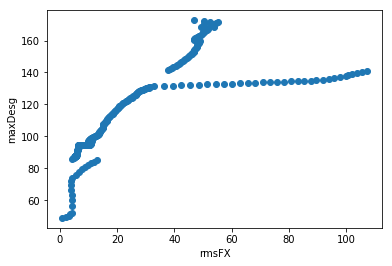

In [13]:
plt.scatter(df1.rmsFX, df1.maxDesg)
plt.xlabel('rmsFX')
plt.ylabel('maxDesg')
plt.show()

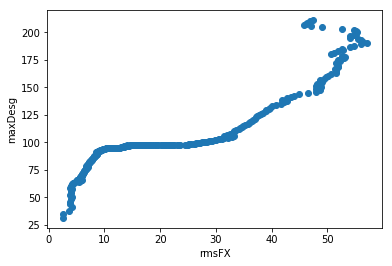

In [14]:
plt.scatter(df4.rmsFX, df4.maxDesg)
plt.xlabel('rmsFX')
plt.ylabel('maxDesg')
plt.show()

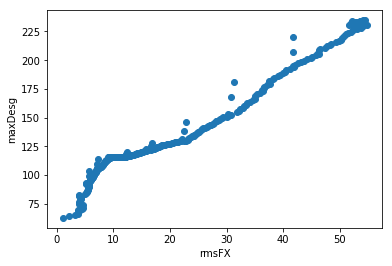

In [15]:
plt.scatter(df6.rmsFX, df6.maxDesg)
plt.xlabel('rmsFX')
plt.ylabel('maxDesg')
plt.show()

<h3>Seleção de características com árvore de decisão</h3>

<h4>Random Forest Regressor</h4>

In [16]:
# Isola as 17 características
X1 = df1.iloc[:,0:17]
X4 = df4.iloc[:,0:17]
X6 = df6.iloc[:,0:17]

# Escolhe o desgaste máximo
Y1 = df1.iloc[:,-1]
Y4 = df4.iloc[:,-1]
Y6 = df6.iloc[:,-1]

# Seleciona o nome das 17 características
names = df1.columns.values
names = names[:17]

# Constrói o modelo de regressão com 100 árvores na floresta
regressor1 = RandomForestRegressor(n_estimators = 100)
regressor4 = RandomForestRegressor(n_estimators = 100)
regressor6 = RandomForestRegressor(n_estimators = 100)

bestRMSE1 = float("inf")
bestRMSE4 = float("inf")
bestRMSE6 = float("inf")
bestScore1 = 0.0
bestScore4 = 0.0
bestScore6 = 0.0
for i in range(50):
    # Divide o dataframe em conjunto de treinamento e conjunto de teste, com 33% das amostras para o conjunto de teste
    XTrain1, XTest1, YTrain1, YTrue1 = train_test_split(X1, Y1, test_size = 0.33)
    XTrain4, XTest4, YTrain4, YTrue4 = train_test_split(X4, Y4, test_size = 0.33)
    XTrain6, XTest6, YTrain6, YTrue6 = train_test_split(X6, Y6, test_size = 0.33)
    for j in range(10):
        # Ajusta o modelo de regressão
        regressor1.fit(X1, Y1)
        regressor4.fit(X4, Y4)
        regressor6.fit(X6, Y6)
        YPred1 = regressor1.predict(XTest1)
        YPred4 = regressor4.predict(XTest4)
        YPred6 = regressor6.predict(XTest6)
        # Calcula a Root Mean Squared Error, que representa o erro associado (quanto menor, melhor)
        currentRMSE1 = metrics.mean_squared_error(YTrue1, YPred1)
        currentRMSE4 = metrics.mean_squared_error(YTrue4, YPred4)
        currentRMSE6 = metrics.mean_squared_error(YTrue6, YPred6)
        currentScore1 = regressor1.score(XTest1, YTrue1)
        currentScore4 = regressor4.score(XTest4, YTrue4)
        currentScore6 = regressor6.score(XTest6, YTrue6)
        #if currentRMSE1 < bestRMSE1:
        if currentScore1 > bestScore1:
            #bestRMSE1 = currentRMSE1
            bestScore1 = currentScore1
            bestRegressor1 = regressor1
            bestYTrue1 = YTrue1
            bestYPred1 = YPred1
            _XTrain1 = XTrain1
            _XTest1 = XTest1
            _YTrain1 = YTrain1
        #if currentRMSE4 < bestRMSE4:
        if currentScore4 > bestScore4:
            #bestRMSE4 = currentRMSE4
            bestScore4 = currentScore4
            bestRegressor4 = regressor4
            bestYTrue4 = YTrue4
            bestYPred4 = YPred4
            _XTrain4 = XTrain4
            _XTest4 = XTest4
            _YTrain4 = YTrain4
        #if currentRMSE6 < bestRMSE6:
        if currentScore6 > bestScore6:
            #bestRMSE6 = currentRMSE6
            bestScore6 = currentScore6
            bestRegressor6 = regressor6
            bestYTrue6 = YTrue6
            bestYPred6 = YPred6
            _XTrain6 = XTrain6
            _XTest6 = XTest6
            _YTrain6 = YTrain6

<h4>Erro associado à predição</h4>

In [17]:
bestRMSE1

inf

In [18]:
bestRMSE4

inf

In [19]:
bestRMSE6

inf

<h4>Coeficiente de determinação R^2 da predição.</h4>
O melhor valor possível é 1.0.

In [20]:
bestScore1

0.9999424065609163

In [21]:
bestScore4

0.9999087404772723

In [22]:
bestScore6

0.9998289627541947

Comparação entre resultados preditos e reais.

In [23]:
result1 = []
for i in range(len(bestYTrue1)):
    result1.append([bestYTrue1.iloc[i], bestYPred1[i]])
result1

[[118.85, 118.9818000000001],
 [105.14, 105.542],
 [94.569, 94.5690000000001],
 [97.109, 96.46025000000014],
 [131.69, 131.7977],
 [117.04, 117.0222000000001],
 [87.391, 87.39099999999982],
 [127.87, 127.69380000000012],
 [94.569, 94.5686400000001],
 [94.427, 94.19949999999992],
 [100.16, 100.05661999999997],
 [171.84, 171.3004],
 [106.54, 106.40770000000008],
 [158.85, 158.9677000000001],
 [162.54, 162.78500000000014],
 [134.24, 134.30129999999986],
 [94.569, 94.5690000000001],
 [112.31, 112.34810000000003],
 [114.71, 114.83369999999987],
 [98.055, 97.95041000000005],
 [94.569, 94.5690000000001],
 [159.93, 159.82830000000016],
 [130.56, 130.6864999999999],
 [131.47, 131.4589999999999],
 [99.649, 99.65930000000002],
 [130.8, 130.74099999999987],
 [160.99, 161.30179999999993],
 [80.934, 80.82014000000008],
 [138.18, 138.38110000000015],
 [134.71, 134.7828999999998],
 [94.569, 94.5690000000001],
 [129.3, 129.41429999999988],
 [94.20700000000001, 94.15509000000011],
 [160.46, 160.47649999

In [24]:
result4 = []
for i in range(len(bestYTrue4)):
    result4.append([bestYTrue4.iloc[i], bestYPred4[i]])
result4

[[97.948, 97.94800000000015],
 [90.865, 90.5845199999999],
 [71.535, 72.01085999999995],
 [106.12, 105.10020000000004],
 [159.15, 159.36309999999983],
 [81.415, 81.33399000000001],
 [94.179, 94.12866000000005],
 [81.881, 81.6653000000001],
 [43.781000000000006, 43.627504999999985],
 [98.164, 98.27916000000005],
 [97.948, 97.94800000000015],
 [82.346, 82.64581999999992],
 [115.59, 115.32490000000008],
 [92.816, 92.77450999999995],
 [98.73200000000001, 98.78808000000001],
 [97.948, 97.94692000000012],
 [84.175, 83.92242000000007],
 [163.09, 163.54320000000004],
 [112.8, 112.75679999999986],
 [143.68, 143.10200000000015],
 [97.948, 97.94773000000015],
 [93.47399999999999, 93.38479000000007],
 [97.948, 97.92102000000014],
 [102.34, 102.35825000000004],
 [68.741, 68.55169000000001],
 [59.592, 59.496099999999934],
 [83.26700000000001, 83.26663999999994],
 [97.948, 97.94825000000016],
 [95.119, 95.11895999999997],
 [172.3, 171.2068999999998],
 [103.48, 103.72379999999987],
 [197.5, 196.824700

In [25]:
result6 = []
for i in range(len(bestYTrue6)):
    result6.append([bestYTrue6.iloc[i], bestYPred6[i]])
result6

[[178.2, 178.35480000000018],
 [111.37, 111.21790000000009],
 [94.95299999999999, 95.08523000000012],
 [126.02, 125.7865000000002],
 [105.16, 105.58399999999996],
 [116.04, 115.8769000000002],
 [134.45, 134.83400000000015],
 [233.45, 233.46860000000032],
 [74.134, 73.32546000000004],
 [148.12, 148.5921000000002],
 [179.5, 180.04359999999997],
 [233.29, 233.18820000000042],
 [114.13, 114.03049999999986],
 [114.63, 114.72029999999987],
 [139.92, 139.72220000000004],
 [101.76, 101.73313000000012],
 [88.641, 89.12645999999988],
 [234.08, 232.71120000000022],
 [116.04, 116.04000000000023],
 [188.59, 188.96400000000008],
 [173.0, 172.09299999999996],
 [210.97, 211.70180000000005],
 [116.04, 116.04000000000023],
 [232.82, 232.74739999999986],
 [119.04, 118.99610000000017],
 [66.487, 67.33948000000004],
 [120.53, 119.6760000000001],
 [148.81, 148.60969999999998],
 [176.9, 176.32839999999993],
 [116.04, 116.04000000000023],
 [118.19, 118.1986],
 [64.13600000000001, 64.46525000000005],
 [137.19,

<h4>Exibição dos resultados</h4>

In [26]:
print("Características ordenadas pela pontuação do experimento 1:")
print(sorted(zip(map(lambda x: round(x, 17), bestRegressor1.feature_importances_), names), reverse = True))

Características ordenadas pela pontuação do experimento 1:
[(0.1919588477966708, 'stdFY'), (0.18594185782291237, 'rmsVY'), (0.13781933153679687, 'stdFX'), (0.10054275808932578, 'rmsFY'), (0.08909876791065267, 'rmsFX'), (0.08313185072430944, 'stdFZ'), (0.07484430210674134, 'rmsFZ'), (0.05196600986776947, 'rmsVX'), (0.0288083396082246, 'maxFZ'), (0.02850471346889288, 'maxFX'), (0.00986919666447325, 'rmsVZ'), (0.00767930553918394, 'maxFY'), (0.00734387517493568, 'meanEA'), (0.00135377574795442, 'stdEA'), (0.00063107121214538, 'kVY'), (0.00038786952380423, 'kVZ'), (0.00011812720520679, 'kVX')]


In [27]:
print("Características ordenadas pela pontuação do experimento 4:")
print(sorted(zip(map(lambda x: round(x, 17), bestRegressor4.feature_importances_), names), reverse = True))

Características ordenadas pela pontuação do experimento 4:
[(0.17517823300225144, 'rmsFX'), (0.16799292766357216, 'rmsVY'), (0.1394155932570008, 'maxFX'), (0.12058378096479162, 'stdFX'), (0.09358573004862906, 'stdFY'), (0.09058047538380316, 'rmsFY'), (0.0628351568136773, 'rmsVX'), (0.05110680081320587, 'meanEA'), (0.02827676377399628, 'stdFZ'), (0.01740916643133289, 'kVZ'), (0.01563463031721648, 'maxFZ'), (0.01306871950264138, 'rmsFZ'), (0.00946712836935988, 'rmsVZ'), (0.00875075364804775, 'kVY'), (0.00432257011006636, 'maxFY'), (0.00142838377374182, 'stdEA'), (0.00036318612666563, 'kVX')]


In [28]:
print("Características ordenadas pela pontuação do experimento 6:")
print(sorted(zip(map(lambda x: round(x, 17), bestRegressor6.feature_importances_), names), reverse = True))

Características ordenadas pela pontuação do experimento 6:
[(0.15216105664048457, 'stdFY'), (0.13323104458755686, 'rmsVY'), (0.13218709328773717, 'stdFX'), (0.11075581933737258, 'maxFX'), (0.10467569494743544, 'rmsFX'), (0.07843062244861132, 'stdFZ'), (0.07473267678376896, 'rmsFZ'), (0.07137526541866762, 'rmsVZ'), (0.04575893444152689, 'maxFZ'), (0.04462594829521998, 'rmsFY'), (0.03124640600320632, 'rmsVX'), (0.01679442247214878, 'maxFY'), (0.00212744550162833, 'meanEA'), (0.000887439672568, 'kVY'), (0.00042592560763551, 'stdEA'), (0.00033576626287865, 'kVZ'), (0.000248438291553, 'kVX')]


<h4>Visualização da importância das 17 características</h4>

Ordenação das características mais relevantes.

In [29]:
# Isola as importâncias das características (quanto maior, mais importante)
importance1 = bestRegressor1.feature_importances_
importance4 = bestRegressor4.feature_importances_
importance6 = bestRegressor6.feature_importances_

# Ordena as importânticas das características 
sorted_importances1 = np.argsort(importance1)
sorted_importances4 = np.argsort(importance4)
sorted_importances6 = np.argsort(importance6)

Plotagens dos gráficos para visualização da importância das características.

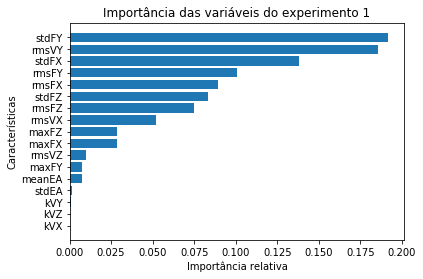

In [30]:
# Plota os dados
plt.barh(names, importance1[sorted_importances1], align = 'center')

# Customiza a plotagem
plt.yticks(names, names[sorted_importances1])
plt.xlabel("Importância relativa")
plt.ylabel("Características")
plt.title("Importância das variáveis do experimento 1")

# Exibe a plotagem
plt.show()

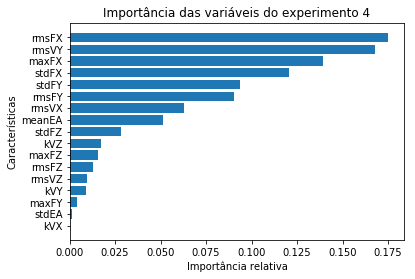

In [31]:
# Plota os dados
plt.barh(names, importance4[sorted_importances4], align = 'center')

# Customiza a plotagem
plt.yticks(names, names[sorted_importances4])
plt.xlabel("Importância relativa")
plt.ylabel("Características")
plt.title("Importância das variáveis do experimento 4")

# Exibe a plotagem
plt.show()

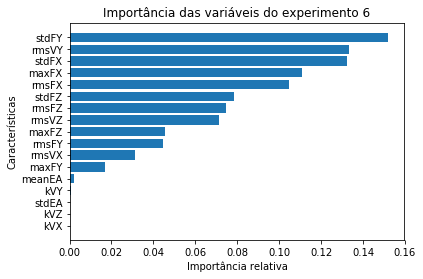

In [32]:
# Plota os dados
plt.barh(names, importance6[sorted_importances6], align = 'center')

# Customiza a plotagem
plt.yticks(names, names[sorted_importances6])
plt.xlabel("Importância relativa")
plt.ylabel("Características")
plt.title("Importância das variáveis do experimento 6")

# Exibe a plotagem
plt.show()

<h4>Correlação de características</h4>

In [ ]:
# Gerando a correlação das características do experimento 1
corr1 = df1.drop(['maxDesg'], axis = 1).corr()

sns.set(font_scale = 1.2)
plt.figure(figsize = (10, 8))

# Exibindo as correlações maiores que 0.9 e menores que -0.9
ax = sns.heatmap(corr1[(corr1 >= 0.9) | (corr1 <= -0.9)], vmax = 1.0, vmin = -1.0, linewidths = 1, annot = True, annot_kws = {"size": 12}, square = True);

In [ ]:
# Gerando a correlação das características do experimento 4
corr4 = df4.drop(['maxDesg'], axis = 1).corr()

sns.set(font_scale = 1.2)
plt.figure(figsize = (10, 8))

# Exibindo as correlações maiores que 0.9 e menores que -0.9
ax = sns.heatmap(corr4[(corr4 >= 0.9) | (corr4 <= -0.9)], vmax = 1.0, vmin = -1.0, linewidths = 1, annot = True, annot_kws = {"size": 12}, square = True);

In [ ]:
# Gerando a correlação das características do experimento 6
corr6 = df6.drop(['maxDesg'], axis = 1).corr()

sns.set(font_scale = 1.2)
plt.figure(figsize = (10, 8))

# Exibindo as correlações maiores que 0.9 e menores que -0.9
ax = sns.heatmap(corr6[(corr6 >= 0.9) | (corr6 <= -0.9)], vmax = 1.0, vmin = -1.0, linewidths = 1, annot = True, annot_kws = {"size": 12}, square = True);